# First Data Preprocessing Project
### Fatima Martínez Torres
For this project, I am to make an analysis of Tweets related with the main hashtag #OctubreRosa, which makes reference to the Breast Cancer Awareness month commemorated in October 19th. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings # Library to ommit the warnings on this Notebook

warnings.filterwarnings("ignore")

## Data Import
The dataset has been obtained from two different tools. The first attempt was made on __Twitter Archiver__ where, due to technical problems each time the rule was run, the records obtained was only 100 per file.

The hashtags used on the query for the extraction of the data in this tool were the following:
* #oncoayuda
* #donacabello
* #pelucasoncologicas
* #DiaMundialdelCancerdeMama
* #19deoctubre
* #bancodetapitas
* #cabezaenalto
* #octubrerosa

Thus, I decided to change the tool. Within __IFTTT__ I could create and configured what is called an Applet where I had the opportunity to connect Twitter and Google Sheets in Drive to create, in a Spreadsheet, a row for each time Twitter could register a new Tweet that fulfiled with my query. In this case, I added more and more hastags, as the Applet were running, for the tool to register as much records as possible:
* #DiaMundialdelCancerdeMama
* #octubrerosa
* #breastcancerawareness
* #PinkOctober
* #donacabello
* #oncoayuda
* #pelucasoncologicas
* #PinkOktober
* #PinkMonth
* #BreastCancerAwarenessMonth
* #BreastCancer
* #FightForACure
* #BreastCancerWarrior
* #TocateParaQueNoTeToque
* #Tocate
* #FightCancer
* #cancersurvivor
* #LuchaContraElCáncerDeMama

As it can be seen, I used both English and Spanish hashtags to get the more information possible. Plus, in this tool. it is possible to write the query as long as Twitter could have done it with the Advanced Search option. Therefore, I decided to add the "since:2020-08-01" part. However, the tool only register records in real time and not as Historical Records.

Then, I realized that every 2000 records, a new file was created.

In [2]:
# IFTTT Tool where each file contains 2000 entries
data_ifttt = pd.read_csv('OctubreRosaDataIFTTT.csv',
                         names=['CreatedAt', 'UserName', 'UserImageUrl', 'Tweet', 'LinkToTweet', 'FirstLinkUrl'])

data_ifttt1 = pd.read_csv('OctubreRosaDataIFTTT(1).csv',
                          names=['CreatedAt', 'UserName', 'UserImageUrl', 'Tweet', 'LinkToTweet', 'FirstLinkUrl'])

data_ifttt2 = pd.read_csv('OctubreRosaDataIFTTT(2).csv',
                          names=['CreatedAt', 'UserName', 'UserImageUrl', 'Tweet', 'LinkToTweet', 'FirstLinkUrl'])

data_ifttt3 = pd.read_csv('OctubreRosaDataIFTTT(3).csv',
                          names=['CreatedAt', 'UserName', 'UserImageUrl', 'Tweet', 'LinkToTweet', 'FirstLinkUrl'])

# This file contains less than 2000 entries
data_ifttt4 = pd.read_csv('OctubreRosaDataIFTTT(4).csv',
                          names=['CreatedAt', 'UserName', 'UserImageUrl', 'Tweet', 'LinkToTweet', 'FirstLinkUrl'])

# Twitter Archiver tool where each file contains 100 aprox. entries
data_archiver1 = pd.read_csv('PrimeroArchiver.csv', header=1)

data_archiver2 = pd.read_csv('SegundoArchiver.csv', header=1)

data_archiver3 = pd.read_csv('TerceroArchiver.csv', header=1)

## Data Exploration
Here, I am interested on integrating all the files from the same tool resource. Therefore I initiate the process by copying the first file of each tool to concatenate there the remaining files.

In [3]:
# Create a copy of the first data frame of each tool to a new variable to matain the original dataset
ifttt_df = data_ifttt.copy()
archiver_df = data_archiver1.copy()

# Lists to iterate on them, without the first one since I already have its copy
ifttt = [data_ifttt1, data_ifttt2, data_ifttt3, data_ifttt4]
archiver = [data_archiver2, data_archiver3]

# Loop to concatenate each file per tool
# I used concatenation since I want to add the rows bellow the previously added.
for i in ifttt:
    ifttt_df = pd.concat([ifttt_df, i], ignore_index=True)
    
for a in archiver:
    archiver_df = pd.concat([archiver_df, a], ignore_index=True)

### IFTTT

In [4]:
# Information of the IFTTT dataframe
ifttt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8682 entries, 0 to 8681
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CreatedAt     8682 non-null   object
 1   UserName      8682 non-null   object
 2   UserImageUrl  8682 non-null   object
 3   Tweet         8682 non-null   object
 4   LinkToTweet   8682 non-null   object
 5   FirstLinkUrl  8682 non-null   object
dtypes: object(6)
memory usage: 407.1+ KB


I notice on the information that I have not any null record in the columns.

In [5]:
# First 5 records of the IFTTT dataframe
ifttt_df.head()

,CreatedAt,UserName,UserImageUrl,Tweet,LinkToTweet,FirstLinkUrl
0,"October 25, 2020 at 08:09PM",@guadalupe_Rmzz,http://pbs.twimg.com/profile_images/1121605355...,"RT @Edomex: #OctubreRosa, mes de la sensibiliz...",http://twitter.com/guadalupe_Rmzz/status/13205...,https://t.co/pEbwpGm9Yn
1,"October 25, 2020 at 08:11PM",@BrowardElem,http://pbs.twimg.com/profile_images/1151097440...,Principal Livingston and some of our amazing s...,http://twitter.com/BrowardElem/status/13205486...,https://t.co/VYDU87DTlH
2,"October 25, 2020 at 08:12PM",@bpierluissi,http://pbs.twimg.com/profile_images/1300609916...,RT @Codehciu: Enfermeras de Bolívar y sobreviv...,http://twitter.com/bpierluissi/status/13205487...,https://t.co/dyEFiAgGct
3,"October 25, 2020 at 08:16PM",@laragusanita13,http://pbs.twimg.com/profile_images/1304270859...,"RT @SaludEdomex: #OctubreRosa, mes de sensibil...",http://twitter.com/laragusanita13/status/13205...,https://t.co/VA30evGYLF
4,"October 25, 2020 at 08:18PM",@ombreaguila,http://pbs.twimg.com/profile_images/1187932250...,RT @JosefinaVM: #OctubreRosa https://t.co/Sgfc...,http://twitter.com/ombreaguila/status/13205504...,https://t.co/SgfcpnHtGR


In [6]:
# Last 5 records of the IFTTT dataframe
ifttt_df.tail()

,CreatedAt,UserName,UserImageUrl,Tweet,LinkToTweet,FirstLinkUrl
8677,"October 31, 2020 at 10:36PM",@jam2020_,http://pbs.twimg.com/profile_images/1294816902...,@ZiaBangashPTI @PTIPeshawar @Saminalvi @Neelam...,http://twitter.com/jam2020_/status/13227594081...,https://t.co/Foap6yfQd7
8678,"October 31, 2020 at 10:37PM",@RugbyStallions1,http://pbs.twimg.com/profile_images/1214865126...,RT @RugbyAfrique: 🏉 🇺🇬 The Uganda Rugby #Unsto...,http://twitter.com/RugbyStallions1/status/1322...,https://t.co/BTH6f0Ws2t
8679,"October 31, 2020 at 10:37PM",@AngelGFC,http://pbs.twimg.com/profile_images/5140370118...,RT @680CARITAS: #VIRAL \n- Una mujer con cánce...,http://twitter.com/AngelGFC/status/13227597099...,https://t.co/OruRzBuvj6
8680,"October 31, 2020 at 10:37PM",@theylove__brii,http://pbs.twimg.com/profile_images/1312258901...,RT @theylove__brii: They say I’m an animal jus...,http://twitter.com/theylove__brii/status/13227...,https://t.co/24vrgEynus
8681,"October 31, 2020 at 10:38PM",@TexansCheer,http://pbs.twimg.com/profile_images/1311556052...,HTC Kelly shares what #BreastCancerAwarenessMo...,http://twitter.com/TexansCheer/status/13227599...,https://t.co/WHKkeyDD6i


### Twitter Archiver

In [7]:
# Information of the Twitter Archiver dataframe
archiver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           300 non-null    object 
 1   Screen Name    300 non-null    object 
 2   Full Name      300 non-null    object 
 3   Tweet Text     300 non-null    object 
 4   Tweet ID       300 non-null    int64  
 5   Link(s)        95 non-null     object 
 6   Media          253 non-null    object 
 7   Location       1 non-null      object 
 8   Retweets       300 non-null    int64  
 9   Favorites      300 non-null    int64  
 10  App            300 non-null    object 
 11  Followers      300 non-null    int64  
 12  Follows        300 non-null    int64  
 13  Listed         300 non-null    int64  
 14  Verfied        32 non-null     object 
 15  User Since     300 non-null    object 
 16  Location.1     257 non-null    object 
 17  Bio            269 non-null    object 
 18  Website   

Location and Time zone columns seem to be empty or almost empty columns since they do not have enough Non-Null entries.

In [8]:
# First 5 records of the IFTTT dataframe
archiver_df.head()

,Date,Screen Name,Full Name,Tweet Text,Tweet ID,Link(s),Media,Location,Retweets,Favorites,...,Followers,Follows,Listed,Verfied,User Since,Location.1,Bio,Website,Timezone,Profile Image
0,21/10/2020 14:26,@CecytemJocot,CECyTEM Jocotitlán,#OctubreRosa. El cáncer de mama se puede preve...,1319027301938393088,http://salud.edomex.gob.mx,https://pbs.twimg.com/media/Ek4gV1MUwAAhQXe.jpg,NaN,0,0,...,452,132,2,NaN,31/5/2015,"Jocotitlán, México",NaN,http://facebook.com/CecytemPlantelJocotitlan,NaN,View
1,21/10/2020 14:15,@CecytemChicolpn,CECyTEM Chicoloapan,#ÉchaleUnaManoATuSalud #OctubreRosa El cáncer ...,1319024547274891267,http://salud.edomex.gob.mx,https://pbs.twimg.com/media/Ek4cl8gW0AEcJL9.jpg,NaN,0,0,...,643,393,4,NaN,26/5/2015,Chicoloapan de Juárez,NaN,http://facebook.com/CecytemPlantelChicoloapan,NaN,View
2,21/10/2020 14:14,@CecytemJilotep,CECyTEM Jilotepec,Acude a tu médico o realiza la autoexploración...,1319024334313295888,NaN,https://pbs.twimg.com/media/Ek4dnbMWMAAVbcq.jpg,NaN,0,0,...,388,165,2,NaN,10/7/2015,NaN,NaN,NaN,NaN,View
3,21/10/2020 14:10,@CESPDEM,@CESPDEM,#ÉchaleUnaManoATuSalud El cáncer de mama se pu...,1319023151624474624,NaN,https://pbs.twimg.com/media/EjwZFE9X0AABvaS.jpg,NaN,0,2,...,5520,208,6,NaN,20/8/2015,NaN,Coordinación Estatal del Servicio Profesional ...,http://cespd.edomex.gob.mx,NaN,View
4,21/10/2020 14:08,@MileSalvini,Mi💚,"Algunas se cortan y donan su pelo, otras se lo...",1319022765068922880,NaN,NaN,NaN,0,1,...,2539,850,0,NaN,26/4/2013,"Santa Fe , Argentina",kinesiología y fisiatria 📚 ig:milesalvini81,NaN,NaN,View


In [9]:
# Last 5 records of the IFTTT dataframe
archiver_df.tail()

,Date,Screen Name,Full Name,Tweet Text,Tweet ID,Link(s),Media,Location,Retweets,Favorites,...,Followers,Follows,Listed,Verfied,User Since,Location.1,Bio,Website,Timezone,Profile Image
295,22/10/2020 15:38,@ArturoH19772369,Arturo Hernández,#ÉchaleUnaManoATuSalud | Si tienes entre 40 y ...,1319407709834235905,NaN,https://pbs.twimg.com/media/Ek96UWXUcAAoPll.jpg,NaN,4,13,...,2113,488,3,NaN,2/12/2017,"Toluca, México",Director de Coordinación Regional de Educación...,NaN,NaN,View
296,22/10/2020 15:37,@LaRegeneracion_,La Regeneración Periódico Feminista,El de mama es el cáncer más diagnosticado en l...,1319407661272780800,NaN,NaN,NaN,0,0,...,422,164,2,NaN,27/1/2020,México,Periódico Oficial y feminista de la Secretaría...,https://laregeneracion.com.mx/,NaN,View
297,22/10/2020 15:35,@ccachivache,clara descalza,"Me hice la ecografía mamaria y está todo bien,...",1319407068579856386,NaN,NaN,NaN,0,4,...,970,841,4,NaN,14/10/2010,"Buenos Aires, Argentina",👣 Mostra. Creer para ver y veo música. Rumbo s...,NaN,NaN,View
298,22/10/2020 15:35,@ITEM_Semov,ITEM,"El cáncer de mama se puede detectar a tiempo, ...",1319406939462402050,NaN,https://pbs.twimg.com/media/Ek95nevXUAAnklo.jpg,NaN,0,0,...,707,171,7,NaN,5/12/2016,"Toluca, Estado de México",Instituto del Transporte del Estado de México,https://twitter.com/SEMOV_Edomex,NaN,View
299,22/10/2020 15:35,@PoliciaCbaOf,Policía de Córdoba,#Ahora. En el marco del programa #OctubreRosa ...,1319406929630945280,NaN,https://pbs.twimg.com/media/Ek95du2XUAQImSQ.jpg,NaN,2,5,...,27487,231,109,NaN,6/6/2011,Córdoba - Argentina,La función de este medio es brindar Informació...,http://www.policiacordoba.gov.ar,NaN,View


I notice that the `Date` column is not sorted. The reason of the latter is that the concatenation adds the records bellow the one being extended. Furthermore, Twitter Archiver stores its record by placing the latest one at the top of the cells. Whereas IFTTT goes on an ascending order.

## Data Cleaning
I notice that `archiver_df` has two columns empty or almost empty, which are `Timezone` and `Location` respectively. Since they are columns that do not add to this project, I delete them.

In [10]:
# List of the almost empty columns names to be deleted on archiver_df
coldrop = ['Location', 'Timezone']

# Use of drop() to delete the columns on coldrop from archiver_df
archiver_df = archiver_df.drop(coldrop, axis=1)

# To verify that I have successfully deleted the colums
archiver_df.columns

Index(['Date', 'Screen Name', 'Full Name', 'Tweet Text', 'Tweet ID', 'Link(s)',
       'Media', 'Retweets', 'Favorites', 'App', 'Followers', 'Follows',
       'Listed', 'Verfied', 'User Since', 'Location.1', 'Bio', 'Website',
       'Profile Image'],
      dtype='object')

In [11]:
# Columns of IFTTT to compare with Twitter Archiver
ifttt_df.columns

Index(['CreatedAt', 'UserName', 'UserImageUrl', 'Tweet', 'LinkToTweet',
       'FirstLinkUrl'],
      dtype='object')

From now, I have both dataframes with the more information each one might contain.

Thus, for practicty, I will create a copy of both Data Frames in case I could use the original integratively later on this project.

In [12]:
# Cell to create the copies
# of the IFTTT DataFrame
ifttt_copy = ifttt_df.copy()
# and Twitter Archiver DataFrame
archiver_copy = archiver_df.copy()

**Here, I start to delete columns on my DataFrames that I will need to analyze Tweets, User Name and Date**

Comparing the list of columns on each DataFrame copy, I can notice some unnecessary columns, such as `Tweet ID` and `Listed`. The later because I have no enough information to know what it contains.

Another column that might be reduntant is the `Full Name` one since the ID for Twitter to identify a user is their @, stablished in this Data Frame as `Screen Name`.

Now, I notice that in `archiver_df` I do not have the column `Link to Tweet`. Therefore, I can delete that column from `ifttt_copy`. Furthermore, the column `UserImageUrl` seems useless for this project so it will be deleted too.

In [13]:
# List that includes the useless columns for this project to be deleted from archiver_copy
useless_col = ['Full Name', 'Tweet ID', 'Link(s)', 'Media', 'Retweets', 'Favorites', 'App', 'Followers',
               'Follows', 'Listed', 'Verfied', 'User Since', 'Location.1', 'Bio', 'Website', 'Profile Image']

# Use of drop() to delete the columns on useless_col from archiver_df
archiver_copy = archiver_copy.drop(useless_col, axis=1)
ifttt_copy = ifttt_copy.drop(['UserImageUrl', 'LinkToTweet', 'FirstLinkUrl'], axis=1)

In [14]:
# Fist 5 records in archiver_copy
archiver_copy.head()

,Date,Screen Name,Tweet Text
0,21/10/2020 14:26,@CecytemJocot,#OctubreRosa. El cáncer de mama se puede preve...
1,21/10/2020 14:15,@CecytemChicolpn,#ÉchaleUnaManoATuSalud #OctubreRosa El cáncer ...
2,21/10/2020 14:14,@CecytemJilotep,Acude a tu médico o realiza la autoexploración...
3,21/10/2020 14:10,@CESPDEM,#ÉchaleUnaManoATuSalud El cáncer de mama se pu...
4,21/10/2020 14:08,@MileSalvini,"Algunas se cortan y donan su pelo, otras se lo..."


In [15]:
# Fist 5 records in ifttt_copy
ifttt_copy.head()

,CreatedAt,UserName,Tweet
0,"October 25, 2020 at 08:09PM",@guadalupe_Rmzz,"RT @Edomex: #OctubreRosa, mes de la sensibiliz..."
1,"October 25, 2020 at 08:11PM",@BrowardElem,Principal Livingston and some of our amazing s...
2,"October 25, 2020 at 08:12PM",@bpierluissi,RT @Codehciu: Enfermeras de Bolívar y sobreviv...
3,"October 25, 2020 at 08:16PM",@laragusanita13,"RT @SaludEdomex: #OctubreRosa, mes de sensibil..."
4,"October 25, 2020 at 08:18PM",@ombreaguila,RT @JosefinaVM: #OctubreRosa https://t.co/Sgfc...


Before concatenating both copies, I will change the format of the columns `Date` in `archiver_copy` and `CreatedAt` in `ifttt_df` for me to be able to store them, since both are on string format. Plus, I want to sort them by date, which I can do using the datetime data type.

### DateTime format on archiver_copy

In [16]:
# ARCHIVER_COPY

# Create a new column to separete the Hour from the Date
archiver_copy['Hour'] = 0

# Iteration to slice the columns 'Date'
for index, row in archiver_copy.iterrows():
    # Last 5 leters on 'Date' goes for the 'Hour' column on its respective index
    archiver_copy['Hour'][index] = archiver_copy['Date'][index][-5:]
    # First 6 leter on 'Date' updates the 'Date' column on its respective index
    archiver_copy['Date'][index] = archiver_copy['Date'][index][:-6]
    
# Applying format of a datetime data type to the columns 'Date' and 'Hour'
archiver_copy['Date'] = pd.to_datetime(archiver_copy['Date'])
archiver_copy['Hour'] = pd.to_datetime(archiver_copy['Hour'], format='%H:%M').dt.time

In [17]:
# First 5 records on archiver_copy to verify that I have successfully changed the format
archiver_copy.head()

,Date,Screen Name,Tweet Text,Hour
0,2020-10-21,@CecytemJocot,#OctubreRosa. El cáncer de mama se puede preve...,14:26:00
1,2020-10-21,@CecytemChicolpn,#ÉchaleUnaManoATuSalud #OctubreRosa El cáncer ...,14:15:00
2,2020-10-21,@CecytemJilotep,Acude a tu médico o realiza la autoexploración...,14:14:00
3,2020-10-21,@CESPDEM,#ÉchaleUnaManoATuSalud El cáncer de mama se pu...,14:10:00
4,2020-10-21,@MileSalvini,"Algunas se cortan y donan su pelo, otras se lo...",14:08:00


However, When I tried to do the same process on `ifttt_df`, there was an error on the format of some entries because there was no hour recorder.

And, by making some tests, I found the row where such entries were in a format that would have not worked for the process I wanted to develop.

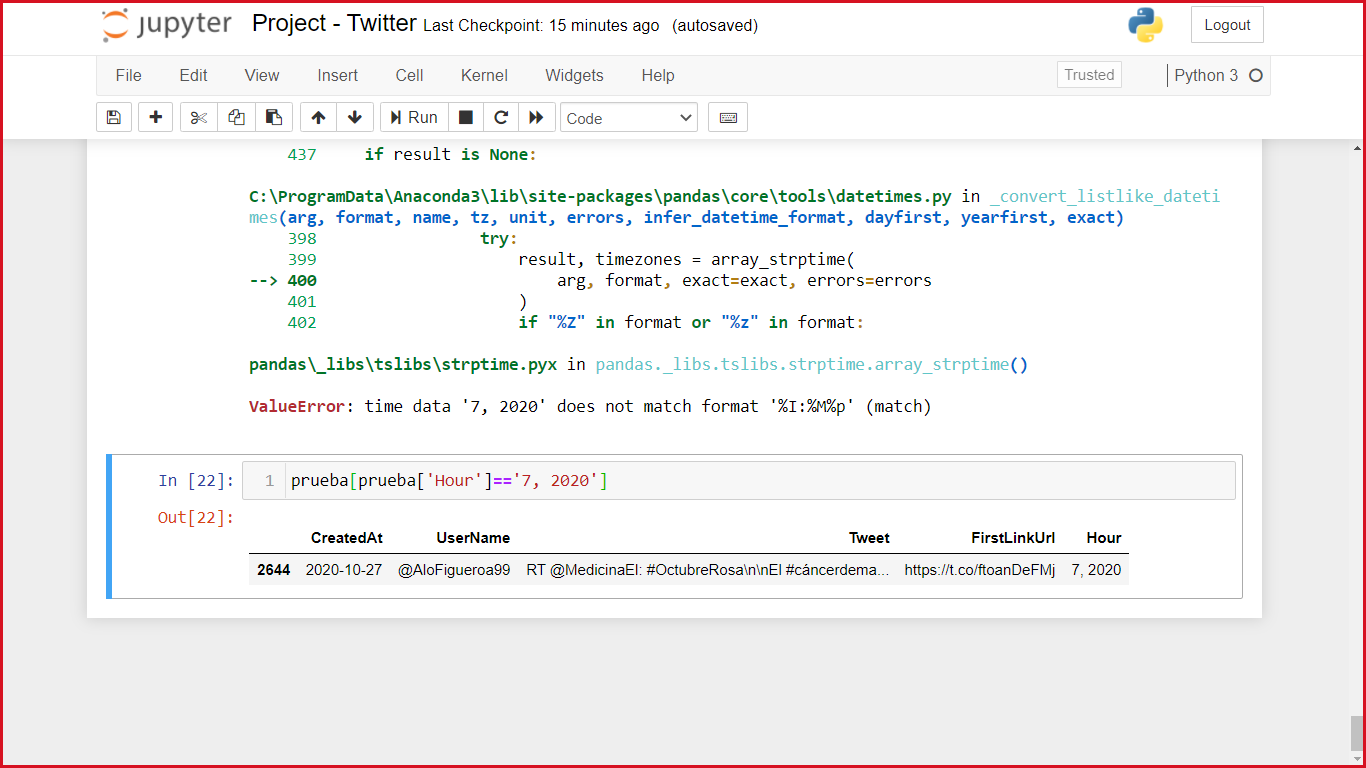
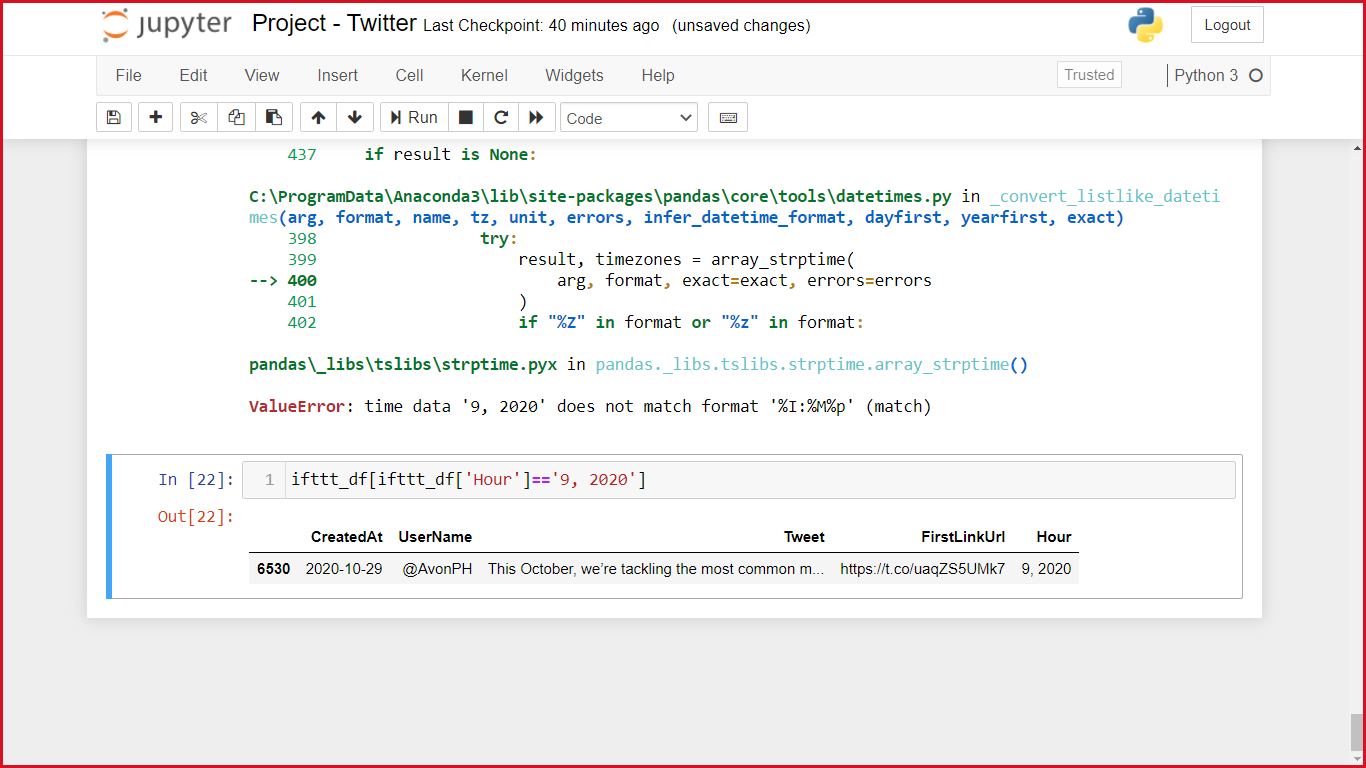

Thus, I decided to delete those conflicting rows with index **2644, 6530**.

In [18]:
#  Drop on conflicting rows
ifttt_copy = ifttt_copy.drop(2644)
ifttt_copy = ifttt_copy.drop(6530)

### DateTime format on ifttt_copy

In [19]:
# IFTTT_COPY

# Create a new column to separete the Hour from the Date
ifttt_copy['Hour'] = 0

# Iteration to slice the columns 'Date'
for index, row in ifttt_copy.iterrows():
    # Last 7 leters on 'Date' goes for the 'Hour' column on its respective index
    ifttt_copy['Hour'][index] = ifttt_copy['CreatedAt'][index][-7:]
    # Leter from the 8 and 16 slice on 'CreatedAt' updates the 'Date' column on its respective index
    # In this DF, the month is stated with leters, thus, I ommit thtat part and replace it with 10 wic is the month number
    ifttt_copy['CreatedAt'][index] = '10, ' + ifttt_copy['CreatedAt'][index][8:16]
    # I update the date, replacing the commas with slashes for the datetime format
    ifttt_copy['CreatedAt'][index] = ifttt_copy['CreatedAt'][index].replace(', ', '/')

# Applying format of a datetime data type to the columns 'Date' and 'Hour'
ifttt_copy['CreatedAt'] = pd.to_datetime(ifttt_copy['CreatedAt'])
ifttt_copy['Hour'] = pd.to_datetime(ifttt_copy['Hour'].str.strip(), format='%I:%M%p').dt.strftime('%H:%M:%S')

In [20]:
# First 5 records on ifttt_copy to verify that I have successfully changed the format
ifttt_copy.head()

,CreatedAt,UserName,Tweet,Hour
0,2020-10-25,@guadalupe_Rmzz,"RT @Edomex: #OctubreRosa, mes de la sensibiliz...",20:09:00
1,2020-10-25,@BrowardElem,Principal Livingston and some of our amazing s...,20:11:00
2,2020-10-25,@bpierluissi,RT @Codehciu: Enfermeras de Bolívar y sobreviv...,20:12:00
3,2020-10-25,@laragusanita13,"RT @SaludEdomex: #OctubreRosa, mes de sensibil...",20:16:00
4,2020-10-25,@ombreaguila,RT @JosefinaVM: #OctubreRosa https://t.co/Sgfc...,20:18:00


Finally, I have both Data Frames `ifttt_df` and `archiver_copy` with the columns of date and Hour in the same format.

Now, before joining the Data Frames, I double check that the remaining columns have the same data type as well.

In [21]:
# Information of the ifttt_copy dataframe
ifttt_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8680 entries, 0 to 8681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   CreatedAt  8680 non-null   datetime64[ns]
 1   UserName   8680 non-null   object        
 2   Tweet      8680 non-null   object        
 3   Hour       8680 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 659.1+ KB


In [22]:
# Information of the archiver_copy dataframe
archiver_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         300 non-null    datetime64[ns]
 1   Screen Name  300 non-null    object        
 2   Tweet Text   300 non-null    object        
 3   Hour         300 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 9.5+ KB


I can see that all the columns have the same Data Type.

The next step is to call all the columns with the same name respectively with their information.

In [23]:
# Columns on ifttt_copy
ifttt_copy.columns

Index(['CreatedAt', 'UserName', 'Tweet', 'Hour'], dtype='object')

In [24]:
# Columns on archiver_copy
archiver_copy.columns

Index(['Date', 'Screen Name', 'Tweet Text', 'Hour'], dtype='object')

In [25]:
# To create the dictionary with the new column names in ifttt_df
to_rename_ifttt = {'CreatedAt': 'Date'}

# To create the dictionary with the new column names in archiver_copy
to_rename_archiver ={'Screen Name': 'UserName', 'Tweet Text': 'Tweet'}

# Renaming the columns
ifttt_copy = ifttt_copy.rename(columns=to_rename_ifttt)
archiver_copy = archiver_copy.rename(columns=to_rename_archiver)

In [26]:
# First 5 records on ifttt_copy to verify that I have successfully changed the columns name
ifttt_copy.head()

,Date,UserName,Tweet,Hour
0,2020-10-25,@guadalupe_Rmzz,"RT @Edomex: #OctubreRosa, mes de la sensibiliz...",20:09:00
1,2020-10-25,@BrowardElem,Principal Livingston and some of our amazing s...,20:11:00
2,2020-10-25,@bpierluissi,RT @Codehciu: Enfermeras de Bolívar y sobreviv...,20:12:00
3,2020-10-25,@laragusanita13,"RT @SaludEdomex: #OctubreRosa, mes de sensibil...",20:16:00
4,2020-10-25,@ombreaguila,RT @JosefinaVM: #OctubreRosa https://t.co/Sgfc...,20:18:00


In [27]:
# First 5 records on archiver_copy to verify that I have successfully changed the columns namearchiver_copy.head()
archiver_copy.head()

,Date,UserName,Tweet,Hour
0,2020-10-21,@CecytemJocot,#OctubreRosa. El cáncer de mama se puede preve...,14:26:00
1,2020-10-21,@CecytemChicolpn,#ÉchaleUnaManoATuSalud #OctubreRosa El cáncer ...,14:15:00
2,2020-10-21,@CecytemJilotep,Acude a tu médico o realiza la autoexploración...,14:14:00
3,2020-10-21,@CESPDEM,#ÉchaleUnaManoATuSalud El cáncer de mama se pu...,14:10:00
4,2020-10-21,@MileSalvini,"Algunas se cortan y donan su pelo, otras se lo...",14:08:00


Now that both Data Frames are ready to be concatenated, I can create the general DataFrame

In [28]:
# Concatenation of both cleaned and well formated dataframes ignoring the index each one originally has
octubrerosa_df = pd.concat([archiver_copy, ifttt_copy], ignore_index=True)

I do have the data integrated in a same Data Frame, but I do not know if there are duplicated data.

In the following cells I will work with them.

In [29]:
# Cell to visualize the duplicated data
octubrerosa_df[octubrerosa_df.duplicated()]

,Date,UserName,Tweet,Hour
158,2020-10-21,@CecytemJocot,#OctubreRosa. El cáncer de mama se puede preve...,14:26:00
159,2020-10-21,@CecytemChicolpn,#ÉchaleUnaManoATuSalud #OctubreRosa El cáncer ...,14:15:00
160,2020-10-21,@CecytemJilotep,Acude a tu médico o realiza la autoexploración...,14:14:00
161,2020-10-21,@CESPDEM,#ÉchaleUnaManoATuSalud El cáncer de mama se pu...,14:10:00
162,2020-10-21,@MileSalvini,"Algunas se cortan y donan su pelo, otras se lo...",14:08:00
163,2020-10-21,@MACFUT,LA MEJOR MANERA DE LUCHAR CONTRA EL CANCER DE ...,14:06:00
164,2020-10-21,@LaNacionPy,#OctubreRosa | Es importante el constante auto...,14:00:00
165,2020-10-21,@juliacuellar82,Seguimos recibiendo sus ilustraciones. Nos cen...,13:55:00
166,2020-10-21,@maac_ac,"#OctubreRosa, es reconocido mundialmente para ...",13:45:00
167,2020-10-21,@BomberosBGA,¡El #CáncerDeMama No discrimina por condición ...,13:39:00


In [30]:
# Check the amount of duplicated data
len(octubrerosa_df[octubrerosa_df.duplicated()])

46

In [31]:
# Here I delete the duplicated data but keeping the first row found
octubrerosa_df = octubrerosa_df.drop_duplicates(keep='first')

In [32]:
# Double cheking the lenght of the duplicated data to see if there have succesfully been deleted
len(octubrerosa_df[octubrerosa_df.duplicated()])

0

In [33]:
# Reseting the index
octubrerosa_df = octubrerosa_df.reset_index(drop=True)

In [34]:
# First 5 records on octubrerosa_df to verify that I have successfully dropped deleted rows
octubrerosa_df.head()

,Date,UserName,Tweet,Hour
0,2020-10-21,@CecytemJocot,#OctubreRosa. El cáncer de mama se puede preve...,14:26:00
1,2020-10-21,@CecytemChicolpn,#ÉchaleUnaManoATuSalud #OctubreRosa El cáncer ...,14:15:00
2,2020-10-21,@CecytemJilotep,Acude a tu médico o realiza la autoexploración...,14:14:00
3,2020-10-21,@CESPDEM,#ÉchaleUnaManoATuSalud El cáncer de mama se pu...,14:10:00
4,2020-10-21,@MileSalvini,"Algunas se cortan y donan su pelo, otras se lo...",14:08:00


In [35]:
# Last 5 records on octubrerosa_df to verify that I have successfully dropped deleted rows
octubrerosa_df.tail()

,Date,UserName,Tweet,Hour
8929,2020-10-31,@jam2020_,@ZiaBangashPTI @PTIPeshawar @Saminalvi @Neelam...,22:36:00
8930,2020-10-31,@RugbyStallions1,RT @RugbyAfrique: 🏉 🇺🇬 The Uganda Rugby #Unsto...,22:37:00
8931,2020-10-31,@AngelGFC,RT @680CARITAS: #VIRAL \n- Una mujer con cánce...,22:37:00
8932,2020-10-31,@theylove__brii,RT @theylove__brii: They say I’m an animal jus...,22:37:00
8933,2020-10-31,@TexansCheer,HTC Kelly shares what #BreastCancerAwarenessMo...,22:38:00


In [36]:
# Information of the octubrerosa_df dataframe
octubrerosa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8934 entries, 0 to 8933
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      8934 non-null   datetime64[ns]
 1   UserName  8934 non-null   object        
 2   Tweet     8934 non-null   object        
 3   Hour      8934 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 279.3+ KB


## Data Transformation
The objective for this project is to analyze the behaviour of each hashtag in a Tweet.

**DISCLAIMER**
The objective of this project leads to the reachment a Tweet may have due to the hashtags used. The latter because there are records stored as Tweets, but that they actually are Retweets.

But first, I would like to make a quick analysis of the data I already have. For that, I would take the advantage of the datetime format on my column 'Date' to create a new column where will be stored a numbre from 0 to 6, making reference to a weekday where 0 is Monday and 6 is Saturday.

In [37]:
# Use of the dayofweek method to store the weekday of the date the tweet was published
octubrerosa_df['Weekday'] = octubrerosa_df['Date'].dt.dayofweek

In [38]:
# First 5 records on octubrerosa_df to verify that I have successfully added the Weekday column
octubrerosa_df.head()

,Date,UserName,Tweet,Hour,Weekday
0,2020-10-21,@CecytemJocot,#OctubreRosa. El cáncer de mama se puede preve...,14:26:00,2
1,2020-10-21,@CecytemChicolpn,#ÉchaleUnaManoATuSalud #OctubreRosa El cáncer ...,14:15:00,2
2,2020-10-21,@CecytemJilotep,Acude a tu médico o realiza la autoexploración...,14:14:00,2
3,2020-10-21,@CESPDEM,#ÉchaleUnaManoATuSalud El cáncer de mama se pu...,14:10:00,2
4,2020-10-21,@MileSalvini,"Algunas se cortan y donan su pelo, otras se lo...",14:08:00,2


In [39]:
# Use of the count() aggregation method on a agupation by 'Weekday' to have the total of tweets per Weekday
days = octubrerosa_df.groupby('Weekday').count()
days

,Date,UserName,Tweet,Hour
Weekday,,,,
0,2440,2440,2440,2440
1,3005,3005,3005,3005
2,1037,1037,1037,1037
3,1002,1002,1002,1002
4,619,619,619,619
5,630,630,630,630
6,201,201,201,201


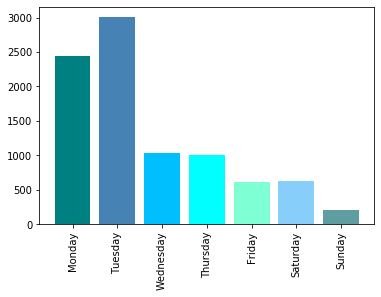

In [40]:
# Bar plot to visualize the amount of tweets per weekday
plt.bar(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], days.Tweet, color=['teal', 'steelblue', 'deepskyblue', 'cyan', 'aquamarine', 'lightskyblue', 'cadetblue'])
plt.xticks(rotation=90)
plt.show()

I can see here that the day of Tuesday was the day where more Tweets were recorded.

But what about the records actually recorded on each day I ran the tools.

I expect to have a specific result, where I have less records those days I was testing on the Twitter Archiver tool, a curve the following days where I changed to the Applet in IFTTT where I started to get the records quickly. However, the latest the date is, the less records I get because those where the last days of the month and the possible campaigns will be at their end.

In [41]:
# Use of the count() aggregation method on a agupation by 'Date' to have the total of tweets per Weekday
tweets = octubrerosa_df.groupby('Date').count()
tweets

,UserName,Tweet,Hour,Weekday
Date,,,,
2020-10-21,158,158,158,158
2020-10-22,100,100,100,100
2020-10-25,201,201,201,201
2020-10-26,2440,2440,2440,2440
2020-10-27,3005,3005,3005,3005
2020-10-28,879,879,879,879
2020-10-29,902,902,902,902
2020-10-30,619,619,619,619
2020-10-31,630,630,630,630


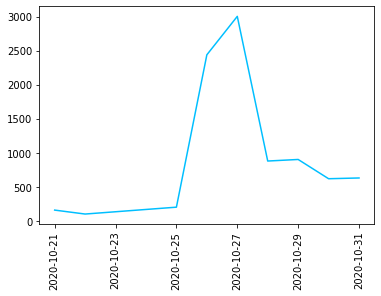

In [42]:
# Plot to visualize the amount of tweets per day
plt.plot(tweets.index, tweets.Tweet, color='deepskyblue')
plt.xticks(rotation=90)
plt.show()

The results were as expected.

I consider this data frame really important, so the next sell is to save is a csv file for its further use.

In [43]:
# Export octubrerosa_df DataFrame to a csv file
# cancel the next comment if you want to save the file
# octubrerosa_df.to_csv('OctubreRosaDS.csv')

# Analysis of words in tweets
The following part of the project is to identify if a hashtag is included on a Tweet.

In order to make that, I will create a new column per hashtag found in the list of hashtags and fill the row with a 0 if there is no hashtag or 1 otherwise.

In [44]:
# Copy of the data frame to have a data frame to work with the hashtags only
hashtags = octubrerosa_df.copy()

# Create all the new columns, one per hashtag
hashtags['#OctubreRosa'] = 0
hashtags['#PinkOctober / #PinkOktober'] = 0
hashtags['#PinkMonth'] = 0
hashtags['#19deoctubre'] = 0
hashtags['#DiaMundialdelCancerdeMama'] = 0
hashtags['#BreastCancer'] = 0
hashtags['#BreastCancerAwareness'] = 0
hashtags['#BreastCancerAwarenessMonth'] = 0
hashtags['#BreastCancerWarrior'] = 0
hashtags['#CancerSurvivor'] = 0
hashtags['#FightCancer'] = 0
hashtags['#FightForACure'] = 0
hashtags['#LuchaContraElCáncerDeMama'] = 0
hashtags['#TocateParaQueNoTeToque'] = 0
hashtags['#Tocate'] = 0
hashtags['#oncoayuda'] = 0
hashtags['#BancodeTapitas'] = 0
hashtags['#CabezaenAlto'] = 0
hashtags['#DonaCabello'] = 0
hashtags['#PelucasOncologicas'] = 0

In [45]:
# Iteration to mark with a 1 if the mentioned hashtag is included on the Tweet
for i, r in hashtags.iterrows():
    if '#octubrerosa' in hashtags['Tweet'][i].lower():
        hashtags['#OctubreRosa'][i] = 1
        
    if '#pinkoctober' in hashtags['Tweet'][i].lower() or '#pinkoktober' in hashtags['Tweet'][i].lower():
        hashtags['#PinkOctober / #PinkOktober'][i] = 1
        
    if '#pinkmonth' in hashtags['Tweet'][i].lower():
        hashtags['#PinkMonth'][i] = 1
        
    if '#19deoctubre' in hashtags['Tweet'][i].lower():
        hashtags['#19deoctubre'][i] = 1
        
    if '#diamundialdelcancerdemama' in hashtags['Tweet'][i].lower() or '#diamundialdelcáncerdemama' in hashtags['Tweet'][i].lower() or '#díamundialdelcancerdemama' in hashtags['Tweet'][i].lower() or '#díamundialdelcáncerdemama' in hashtags['Tweet'][i].lower():
        hashtags['#DiaMundialdelCancerdeMama'][i] = 1
        
    if '#breastcancer' in hashtags['Tweet'][i].lower():
        hashtags['#BreastCancer'][i] = 1
        
    if '#breastcancerawareness' in hashtags['Tweet'][i].lower():
        hashtags['#BreastCancerAwareness'][i] = 1
        
    if '#breastcancerawarenessmonth' in hashtags['Tweet'][i].lower():
        hashtags['#BreastCancerAwarenessMonth'][i] = 1
        
    if '#breastcancerwarrior' in hashtags['Tweet'][i].lower():
        hashtags['#BreastCancerWarrior'][i] = 1
        
    if '#cancersurvivor' in hashtags['Tweet'][i].lower():
        hashtags['#CancerSurvivor'][i] = 1
        
    if '#fightcancer' in hashtags['Tweet'][i].lower():
        hashtags['#FightCancer'][i] = 1
        
    if '#fightforacure' in hashtags['Tweet'][i].lower():
        hashtags['#FightForACure'][i] = 1
        
    if '#luchacontraelcáncerdemama' in hashtags['Tweet'][i].lower() or '#luchacontraelcancerdemama' in hashtags['Tweet'][i].lower():
        hashtags['#LuchaContraElCáncerDeMama'][i] = 1
        
    if '#tocateparaquenotetoque' in hashtags['Tweet'][i].lower() or '#tócateparaquenotetoque' in hashtags['Tweet'][i].lower():
        hashtags['#TocateParaQueNoTeToque'][i] = 1
        
    if '#tocate' in hashtags['Tweet'][i].lower() or '#tócate' in hashtags['Tweet'][i].lower():
        hashtags['#Tocate'][i] = 1
        
    if '#oncoayuda' in hashtags['Tweet'][i].lower():
        hashtags['#oncoayuda'][i] = 1
    
    if '#bancodetapitas' in hashtags['Tweet'][i].lower():
        hashtags['#BancodeTapitas'][i] = 1
        
    if '#cabezaenalto' in hashtags['Tweet'][i].lower():
        hashtags['#CabezaenAlto'][i] = 1
        
    if '#donacabello' in hashtags['Tweet'][i].lower():
        hashtags['#DonaCabello'][i] = 1
        
    if '#pelucasoncologicas' in hashtags['Tweet'][i].lower() or '#pelucasoncológicas' in hashtags['Tweet'][i].lower():
        hashtags['#PelucasOncologicas'][i] = 1

In [46]:
# First 5 records on hashtags to verify that I have successfully marked the hashtag contained in the tweet
hashtags.head()

,Date,UserName,Tweet,Hour,Weekday,#OctubreRosa,#PinkOctober / #PinkOktober,#PinkMonth,#19deoctubre,#DiaMundialdelCancerdeMama,...,#FightCancer,#FightForACure,#LuchaContraElCáncerDeMama,#TocateParaQueNoTeToque,#Tocate,#oncoayuda,#BancodeTapitas,#CabezaenAlto,#DonaCabello,#PelucasOncologicas
0,2020-10-21,@CecytemJocot,#OctubreRosa. El cáncer de mama se puede preve...,14:26:00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-10-21,@CecytemChicolpn,#ÉchaleUnaManoATuSalud #OctubreRosa El cáncer ...,14:15:00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-10-21,@CecytemJilotep,Acude a tu médico o realiza la autoexploración...,14:14:00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-10-21,@CESPDEM,#ÉchaleUnaManoATuSalud El cáncer de mama se pu...,14:10:00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-10-21,@MileSalvini,"Algunas se cortan y donan su pelo, otras se lo...",14:08:00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
# Use of the count() aggregation method on a agupation by '#OctubreRosa' to have the total of tweets that used that hashtag
octubrerosa = hashtags.groupby('#OctubreRosa').count()
octubrerosa

,Date,UserName,Tweet,Hour,Weekday,#PinkOctober / #PinkOktober,#PinkMonth,#19deoctubre,#DiaMundialdelCancerdeMama,#BreastCancer,...,#FightCancer,#FightForACure,#LuchaContraElCáncerDeMama,#TocateParaQueNoTeToque,#Tocate,#oncoayuda,#BancodeTapitas,#CabezaenAlto,#DonaCabello,#PelucasOncologicas
#OctubreRosa,,,,,,,,,,,,,,,,,,,,,
0,6941,6941,6941,6941,6941,6941,6941,6941,6941,6941,...,6941,6941,6941,6941,6941,6941,6941,6941,6941,6941
1,1993,1993,1993,1993,1993,1993,1993,1993,1993,1993,...,1993,1993,1993,1993,1993,1993,1993,1993,1993,1993


The same process of the latter cell can be made for any other column to see their information.

Now, it is of my interest to know the accounts that tweeted the most about the topic. So that, I chose to create a WordCloud. Let's see what happens if I generate the graph with the column 'UserName' from a copy of the octubrerosa_df dataframe.

In [48]:
# Cancel the next line if you need to install the wordcloud library
# ! pip install wordcloud

from wordcloud import WordCloud

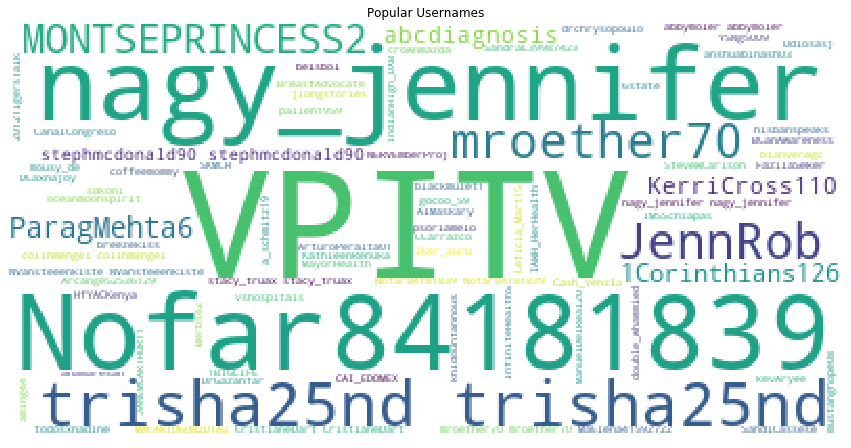

In [49]:
# Copy of the octubrerosa_df dataframe
usernames = octubrerosa_df.copy()

# Variable where the WrodCLoud is generated from a text extracted from all the users in the columns 'UserName' from usernames
username_wc = WordCloud(background_color='white').generate(' '.join(usernames['UserName']))

# PLot of the WordCloud stored in the variable username_wc
plt.figure(figsize = (15,10))
plt.imshow(username_wc, interpolation='nearest')
plt.axis('off')
plt.title('Popular Usernames')
plt.show()

The account most highlited here is @VPITV which is the account of a TV channel from Venezuela and trnsmited in the United States as well. This might be due to a campaign where they were involved.

Another WordCloud, and the last one, might be the one with the words used on Tweets. Let's see what happens if I plot the figure.

In [50]:
# Variable where the WrodCLoud is generated from a text extracted from all the tweets in the columns 'Tweet' from octubrerosa_df
words = WordCloud(background_color='white').generate(' '.join(octubrerosa_df['Tweet']))
words

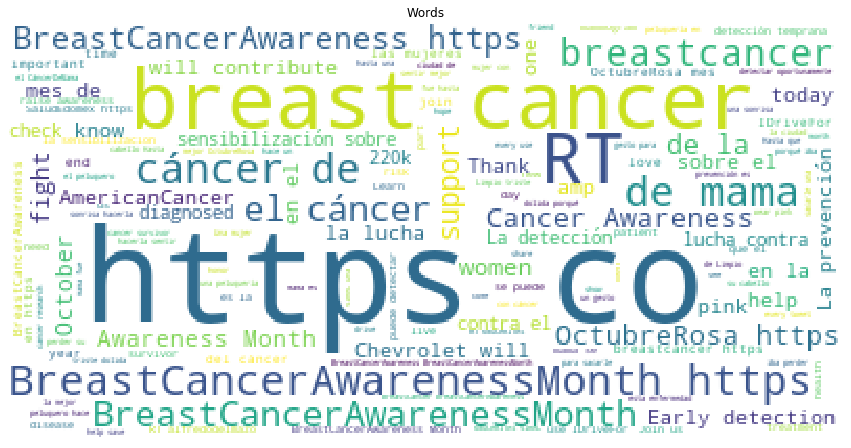

In [51]:
# Plotting the WordCloud stored in the variable words
plt.figure(figsize = (15,10))
plt.imshow(words, interpolation='nearest')
plt.axis('off')
plt.title('Words')
plt.show()

Based on the WordCloud I can infer that the column `Tweet` needs more cleaning, just to take into account all the _important_ words, without conjuctions, prepositions, and those axuliar words that help us to formulate a sentence.

For that, I will import a new library (NLTK) to obtain all those unneeded words called _stop words_ from both Spanish and English.

In [52]:
# Demark the next three comments to import and download the needed packages.
# import nltk
# nltk.download('punkt')
# nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [53]:
# Stop Words in Eglish
stop_words_en = list(stopwords.words('english')) 
# Stop Words in Spanish
stop_words_sp = list(stopwords.words('spanish'))

# List of all the hashtags I have stored before to only discard them
# I add a few more words to delete such as 'https' and 'rt'
lista_hashtags = ['oncoayuda', 'donacabello', 'pelucasoncologicas', 'pelucasoncológicas', 'diamundialdelcancerdemama',
                  'díamundialdelcancerdemama', 'diamundialdelcáncerdemama', 'díamundialdelcáncerdemama','19deoctubre',
                  'bancodetapitas', 'cabezaenalto', 'octubrerosa', 'breastcancerawareness', 'pinkoctober',
                  'pinkoktober', 'pinkmonth', 'breastcancerawarenessmonth', 'breastcancer', 'fightforacure',
                  'breastcancerwarrior', 'tocateparaquenotetoque', 'tócateparaquenotetoque', 'tocate', 'tócate',
                  'fightcancer', 'cancersurvivor', 'luchacontraelcáncerdemama', 'luchacontraelcancerdemama', 'https', 'http', '//', 'rt']

# List with all the punctuation marks
puntos = list('!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~')

In [54]:
# List with all the elements I have to delete from the tweets
puntos.extend(lista_hashtags)
puntos.extend(stop_words_en)
puntos.extend(stop_words_sp)

As done before on others WordClouds, I will:
1. Create a whole text that includes all the tweets to:
2. Apply a word_tokenize and make the text a list of its words
3. Iterate over tokenized words to ommit those included on the puntos lists
4. Apply .join() to the cleaned list of words to, finally
5. Import the cleaned text to a variable for the WordCloud

In [55]:
# 1.
# Join all the Tweets in the column 'Tweet' from the octubrerosa_df dataframe
tweetstext = ' '.join(octubrerosa_df['Tweet'])

# For practicity purposes, I make all the text in lower case
tweetstext = tweetstext.lower()

# 2.
# Tokenization of the text to make it a list which elements are all its words
word_tokens = word_tokenize(tweetstext)

# 3.
# Comprehension list to just keep those words that are not included on my list puntos
# I use this method since others, like remove() onl deletes the first element found
# I store the text obtained on a cariable cleaned
cleaned = [word for word in word_tokens if word not in puntos]

# 4.
# Join all the elements of the cleaned list into a text of string data type
tweetstext = ' '.join(cleaned)

# 5.
# Variable where the WrodCLoud is generated from the cleaned text
words2 = WordCloud(background_color='white').generate(tweetstext)

The las step, is to plot the image.

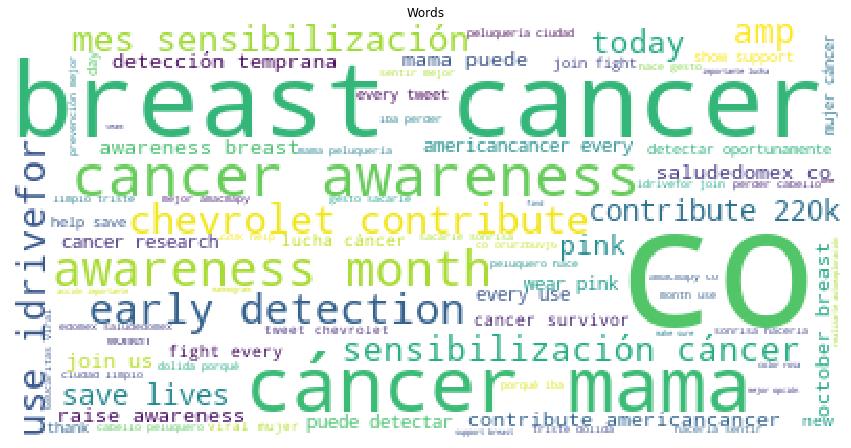

In [56]:
# Plotting the WordCloud stored in the variable words2
plt.figure(figsize = (15,10))
plt.imshow(words2, interpolation='nearest')
plt.axis('off')
plt.title('Words')
plt.show()

I can see, then, in this image, that there is a considerable use of key words such as _"early detection"_ which might be from a well done campaign, _"mes sensibilización"_ making the words real since the message has been spread, and so on.

# Conclusion of the analysis
Based on the results obtained on the images of all the WordClouds, among all the important ithings they might show, I can infer a specific case:

On the UserName's WordCoud there are plenty of people really occupied and concern on the topic of the Breast Cancer Awareness. Even though in the last WordCloud there were some other hashtags or accounts highlighted, such as @saludedomex, account of the healt & care sector wich is expected to share the more information possible, the first WordCloud shows that the iteraction with other users counts, with the purpose of spreading information.
There were more unknown people that highlighted on the spread of the information that official accounts.

On the other hand, it is of my interest that, in the WordCloud of words in Tweets, there one that stands out form me: **Chevrolet contribute**. This makes me think about all the effort they put on the campaigns such company might contribute with, and their participation on the topic, because, they know their influence on others through their social media, since it is a huge mentioned phrase, even though the company is not present as a active account on this topic.

Making an overall conclusion, being a student involved on Data Science, it is hard for me to confirm any statement by just having the Data Preprocessing of a dataset. This is why, it is the first step on a whole process of analysis, because, from here, we start to infer what would happen, and then whether confirm it or deny it with a applicatication and further analysis.